# SMU-MSDS-7333-Quantifying the World

## Case Study 3- Email Classification as Span or Ham 

Team Members:
* Rashmi Patel
* Simarpreet Reddy


# Introduction

In this case study, we will build a classifier using clustering and naive bayes classifier that classifies whether the email given is spam or ham. We will perform analysis by dividing this case study into 6 parts:

* Business Understanding

* Data Evaluation / Engineering

* Modeling Preparations

* Model Building & Evaluation

* Model Interpretability & Explainability

* Case Conclusions

In [103]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sklearn as sk
import re
import os

#NLP
import nltk
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Email Parser 
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup

## Business Understanding

## Data Evaluation/ Engineering

In [104]:
os.listdir()

['spam',
 'hard_ham',
 'spam_2',
 '.DS_Store',
 'Email Parsing and Word Vector Demo.ipynb',
 'easy_ham',
 'RP_SR_7333_CaseStudy3.ipynb',
 'demo reference cs3.ipynb',
 '.ipynb_checkpoints',
 'easy_ham_2',
 'MasterCopy.ipynb']

In [105]:
root = '/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy3'
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)

Email Parsing and Word Vector Demo.ipynb
RP_SR_7333_CaseStudy3.ipynb
demo reference cs3.ipynb
MasterCopy.ipynb


In [106]:
folder = [fdr for fdr in os.listdir('.') if (re.match(r'easy', fdr)) or (re.match(r'hard', fdr)) or (re.match(r'spam', fdr))]
folder

['spam', 'hard_ham', 'spam_2', 'easy_ham', 'easy_ham_2']

In [107]:
directory = []
for i in range(len(folder)):
    directory = folder[i]
    print(directory,':',len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]))


spam : 1001
hard_ham : 501
spam_2 : 934
easy_ham : 5052
easy_ham_2 : 1401


In [108]:
def strip_head(text):
    tmp=[]
    flag = False
    for i in text:
        if i=='':
            flag = True
        if flag == True:
            tmp.append(i)
    return tmp

In [109]:
def get_text(email):
    if email.is_multipart():
        tmp = email.get_payload()[0]
        return get_text(tmp)
    elif email.is_multipart() == False:
        return email

In [110]:
targets_eh = []
data_eh = []
count_eh = 0
not_spamList = os.listdir("./easy_ham/")
for i in not_spamList:
    with open("./easy_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_eh.append(tmp)
        targets_eh.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_eh.append(tmp)
        targets_eh.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data_eh))
print('Number of targets for easy_ham:',len(targets_eh))



Number of emails parsed in easy_ham: 5052
Number of targets for easy_ham: 5052


In [111]:
targets_eh2 = []
data_eh2 = []
count_eh2 = 0
not_spamList = os.listdir("./easy_ham_2/")
for i in not_spamList:
    with open("./easy_ham_2/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_eh2.append(tmp)
        targets_eh2.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_eh2.append(tmp)
        targets_eh2.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data_eh2))
print('Number of targets for easy_ham:',len(targets_eh2))

Number of emails parsed in easy_ham: 1401
Number of targets for easy_ham: 1401


In [112]:
targets_hh = []
data_hh = []
count_hh = 0
not_spamList = os.listdir("./hard_ham/")
for i in not_spamList:
    with open("./hard_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_hh.append(tmp)
        targets_hh.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_hh.append(tmp)
        targets_hh.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data_hh))
print('Number of targets for easy_ham:',len(targets_hh))

Number of emails parsed in easy_ham: 501
Number of targets for easy_ham: 501


In [113]:

targets_sp = []
data_sp = []
count_sp = 0
spamList = os.listdir("./spam/")
for i in spamList:
    with open("./spam/"+i, "r",encoding= 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_sp.append(tmp)
        targets_sp.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_sp.append(tmp)
        targets_sp.append(1)
    elif mailType == "multipart/alternative":
        tmp = BeautifulSoup(x.get_payload())
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_sp.append(tmp)
        targets_sp.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data_sp))
print('Number of targets for easy_ham:',len(targets_sp))

Number of emails parsed in easy_ham: 1001
Number of targets for easy_ham: 1001


In [114]:
# # 1 msg not parsed 
# # need to work on text/plain charset=us-ascii for parsing.
import chardet

targets_sp2 = []
data_sp2 = []
count_sp2 = 0
spamList = os.listdir("./spam_2/")
for i in spamList:
    with open("./spam_2/"+i, "r",encoding = 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore' or 'surrogateescape') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == "text/plain":
        tmp = x.get_payload()
        data_sp2.append(tmp)
        targets_sp2.append(1)
    elif mailType == "text/plain charset=us-ascii":
        tmp = x.get_payload()
        data_sp2.append(tmp)
        targets_sp2.append(1)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_sp2.append(tmp)
        targets_sp2.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data_sp2))
print('Number of targets for easy_ham:',len(targets_sp2))



Number of emails parsed in easy_ham: 934
Number of targets for easy_ham: 934


In [115]:
data_total=len(data_sp2)+len(data_sp)+len(data_eh)+len(data_eh2)+len(data_hh)
target_total=len(targets_sp2)+len(targets_sp)+len(targets_eh)+len(targets_eh2)+len(targets_hh)

data_total==target_total
print(target_total)

8889


In [116]:
data=data_sp2+data_sp+data_eh+data_eh2+data_hh
targets=targets_sp2+targets_sp+targets_eh+targets_eh2+targets_hh

print(len(data))
print(len(targets))

8889
8889


In [117]:
# Number of files parsed 
num=0
for i in range(len(folder)):
    t=len([name for name in os.listdir(folder[i]) if os.path.isfile(os.path.join(folder[i], name))])
    num=num+t

print('The total files given for parsing from different folders was:',num)
print('The total files parsed from different folders was:',data_total)
print('There was',num-data_total,'file/files which did not get parsed.')


The total files given for parsing from different folders was: 8889
The total files parsed from different folders was: 8889
There was 0 file/files which did not get parsed.


In [118]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopset = set(stopwords.words('english'))
def remove_stopwords(dt):
    output_array=[]
    for sen in dt:
        temp_list=[]
        for word in sen.split():
            if word.lower() not in stopset:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

new_data = remove_stopwords(data)
print("data",len(data))
print("new_data",len(new_data))
print(np.unique(targets))

data 8889
new_data 8889
[0 1]


In [119]:
d={'Email': new_data, 'Spam/NotSpam': targets}
df=pd.DataFrame(data=d)
df.head()

,Email,Spam/NotSpam
0,Venez rencontrer l'ame soeur sur LOVEIMPACT.co...,1
1,"man endowed 7 8"" hammer simply better equipped...",1
2,"Date:May 16,2002. Email:edum@hkem.com. Dear Si...",1
3,<HTML> <BODY> FREE CASINO SPORTSBOOK! EARNING ...,1
4,"Hi, make $50,000 next 90 days sending e-mail. ...",1


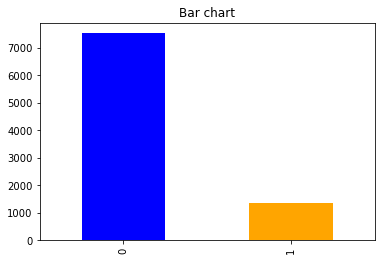

In [120]:
count_Class=pd.value_counts(df["Spam/NotSpam"])
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

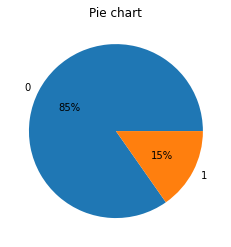

In [121]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Modeling Preparations

## Model building & Evaluations

In [122]:
X_train, X_test, y_train, y_test = train_test_split(new_data, targets,test_size=0.30, shuffle=True, random_state=42)

In [123]:
#Model using Count Vectorizer
cv = CountVectorizer(tokenizer = nltk.word_tokenize,stop_words = nltk.corpus.stopwords.words("english"))
cv_data_train = cv.fit_transform(X_train)
cv_data_test = cv.transform(X_test)

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [144]:
#print(df[0:1]['Email'].values[0])

Venez rencontrer l'ame soeur sur LOVEIMPACT.com > Inscription gratuite > Consultez les fiches > Dialoguez en direct Inscrivez-vous gratuitement en cliquant ici : http://www.imp20.com/loveimpact/loveimpact300702-2.htm Vous recevez cet e-mail en tant qu'abonn Oktomail Pour ne plus tre contact, cliquez ici : http://www.imp20.com/loveimpact/loveimpact300702-remove.htm


In [124]:
# Iterating through different values of aplha for builiding the model 
list_alpha = np.arange(1/100000, 10, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
f1score_test=np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(cv_data_train, y_train)
    score_train[count] = bayes.score(cv_data_train, y_train)
    score_test[count]= bayes.score(cv_data_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(cv_data_test))
    f1score_test[count] = metrics.f1_score(y_test, bayes.predict(cv_data_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(cv_data_test))
    count = count + 1 

In [125]:
matrix_cv = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test,f1score_test, precision_test])
models_cv = pd.DataFrame(data = matrix_cv, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall','Test F1-Score', 'Test Precision'])
models_cv.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test F1-Score,Test Precision
0,0.00001,0.992125,0.957255,0.832134,0.858911,0.887468
1,0.11001,0.971070,0.948631,0.911271,0.847269,0.791667
2,0.22001,0.969463,0.947882,0.923261,0.847085,0.782520
3,0.33001,0.967695,0.944882,0.920863,0.839344,0.771084
4,0.44001,0.967535,0.943757,0.911271,0.835165,0.770791
5,0.55001,0.967695,0.943757,0.908873,0.834802,0.771894
6,0.66001,0.967535,0.943382,0.901679,0.832780,0.773663
7,0.77001,0.967695,0.942257,0.894484,0.828889,0.772257
8,0.88001,0.967213,0.941882,0.884892,0.826428,0.775210
9,0.99001,0.966410,0.942632,0.870504,0.825939,0.785714


In [126]:
best_index = models_cv['Test Accuracy'].idxmax()
models_cv.iloc[best_index, :]

alpha             0.000010
Train Accuracy    0.992125
Test Accuracy     0.957255
Test Recall       0.832134
Test F1-Score     0.858911
Test Precision    0.887468
Name: 0, dtype: float64

In [127]:
# Model for best aplha to see metrics for spam and not spam separately
model = naive_bayes.MultinomialNB(alpha=0.00001)
model.fit(cv_data_train, y_train)
cv_preds = model.predict(cv_data_test) 
model.score(cv_data_train, y_train)
model.score(cv_data_test, y_test)

print(classification_report(y_test,cv_preds,target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.97      2250
        Spam       0.89      0.83      0.86       417

    accuracy                           0.96      2667
   macro avg       0.93      0.91      0.92      2667
weighted avg       0.96      0.96      0.96      2667



<function matplotlib.pyplot.show(close=None, block=None)>

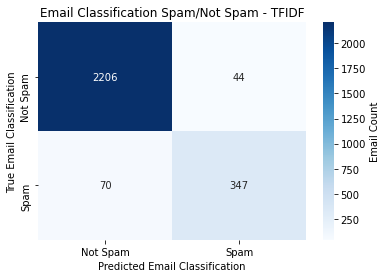

In [128]:
cm0 = confusion_matrix(y_test,cv_preds)
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - TFIDF')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cv_preds,target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.97      2250
        Spam       0.89      0.83      0.86       417

    accuracy                           0.96      2667
   macro avg       0.93      0.91      0.92      2667
weighted avg       0.96      0.96      0.96      2667



In [130]:
tfIdf = TfidfVectorizer(tokenizer = nltk.word_tokenize, stop_words = nltk.corpus.stopwords.words("english"))

In [131]:
tf_data_train = tfIdf.fit_transform(X_train)
tf_data_test = tfIdf.transform(X_test)

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [132]:
# # Iterating through different values of aplha for builiding the model  using 
list_alpha = np.arange(1/100000, 5, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
f1score_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(tf_data_train, y_train)
    score_train[count] = bayes.score(tf_data_train, y_train)
    score_test[count]= bayes.score(tf_data_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(tf_data_test))
    f1score_test[count] = metrics.f1_score(y_test, bayes.predict(tf_data_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(tf_data_test))
    count = count + 1 

In [133]:
matrix_tf = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test,f1score_test, precision_test])
models_tf = pd.DataFrame(data = matrix_tf, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall','Test F1-Score', 'Test Precision'])
models_tf.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test F1-Score,Test Precision
0,0.00001,0.996464,0.961755,0.817746,0.869898,0.929155
1,0.11001,0.981356,0.943382,0.693046,0.792867,0.926282
2,0.22001,0.952427,0.915636,0.498801,0.648986,0.928571
3,0.33001,0.929926,0.898013,0.369305,0.531034,0.944785
4,0.44001,0.914979,0.886014,0.280576,0.434944,0.966942
5,0.55001,0.902604,0.881890,0.244604,0.393064,1.000000
6,0.66001,0.893121,0.874391,0.196643,0.328657,1.000000
7,0.77001,0.884442,0.869141,0.163070,0.280412,1.000000
8,0.88001,0.881067,0.866142,0.143885,0.251572,1.000000
9,0.99001,0.877853,0.865392,0.139089,0.244211,1.000000


In [134]:
best_index = models_tf['Test Accuracy'].idxmax()
models_tf.iloc[best_index, :]

alpha             0.000010
Train Accuracy    0.996464
Test Accuracy     0.961755
Test Recall       0.817746
Test F1-Score     0.869898
Test Precision    0.929155
Name: 0, dtype: float64

In [135]:
# Model for best aplha to see metrics for spam and not spam separately
model = naive_bayes.MultinomialNB(alpha=0.00001)
model.fit(tf_data_train, y_train)
tf_preds = model.predict(tf_data_test) 
model.score(tf_data_train, y_train)
model.score(tf_data_test, y_test)
print(classification_report(y_test,tf_preds,target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.97      0.99      0.98      2250
        Spam       0.93      0.82      0.87       417

    accuracy                           0.96      2667
   macro avg       0.95      0.90      0.92      2667
weighted avg       0.96      0.96      0.96      2667



<function matplotlib.pyplot.show(close=None, block=None)>

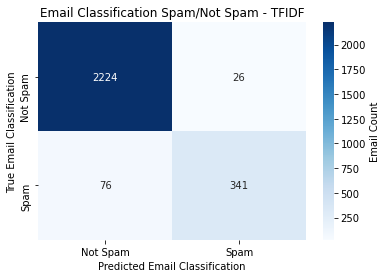

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm0 = confusion_matrix(y_test,tf_preds)
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - TFIDF')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show


## Model Interpretabilty & Explainability

## Case Conclusions

In [137]:
# Reference code for solving the 1 file which was not parsed.





# import chardet

# # for SAPM MAILS

# spam_root = '/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy3/spam/'

# spam_files=[name for name in os.listdir(folder[0]) if os.path.isfile(os.path.join(folder[0], name))]
# #print(spam_files)

# for file in spam_files:
#     with open(spam_root+ file,'r', encoding='latin1') as f:
#         tmp= email.message_from_file(f)
#         tmp=get_text(tmp)

# str()

# def get_text(msg):
#     """ Parses email message text, given message object
#     This doesn't support infinite recursive parts, but mail is usually not so naughty.
#     """
#     text = ""
#     if msg.is_multipart():
#         html = None
#         for part in msg.get_payload():
#             if part.get_content_charset() is None:
#                 charset = chardet.detect(str(part))['encoding']
#             else:
#                 charset = part.get_content_charset()
#             if part.get_content_type() == 'text/plain':
#                 text = unicode(part.get_payload(decode=True),str(charset),"ignore").encode('utf8','replace')
#             if part.get_content_type() == 'text/html':
#                 html = unicode(part.get_payload(decode=True),str(charset),"ignore").encode('utf8','replace')
#             if part.get_content_type() == 'multipart/alternative':
#                 for subpart in part.get_payload():
#                     if subpart.get_content_charset() is None:
#                         charset = chardet.detect(str(subpart))['encoding']
#                     else:
#                         charset = subpart.get_content_charset()
#                     if subpart.get_content_type() == 'text/plain':
#                         text = unicode(subpart.get_payload(decode=True),str(charset),"ignore").encode('utf8','replace')
#                     if subpart.get_content_type() == 'text/html':
#                         html = unicode(subpart.get_payload(decode=True),str(charset),"ignore").encode('utf8','replace')

#         if html is None:
#             return text.strip()
#         else:
#             return html.strip()
#     else:
#         text = unicode(msg.get_payload(decode=True),msg.get_content_charset(),'ignore').encode('utf8','replace')
#         return text.strip()
    
    
# print(msg)


In [138]:
# Vectorize the features using CountVectorizer

cv_vec = sk.feature_extraction.text.CountVectorizer(tokenizer = nltk.word_tokenize, 
                                                    stop_words = nltk.corpus.stopwords.words("english"))

cv_X = cv_vec.fit_transform(df.Email)

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [139]:
# Vectorize the features using TfidfVectorizer

tfidf_vec = sk.feature_extraction.text.TfidfVectorizer(tokenizer = nltk.word_tokenize, 
                                                    stop_words = nltk.corpus.stopwords.words("english"))

tdidf_X = cv_vec.fit_transform(df.Email)

In [140]:
# label encode the labels using LabelEncoder

label_encoder = sk.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df['Spam/NotSpam'])

In [141]:
model_sklearn_mnb = MultinomialNB()

NameError: name 'MultinomialNB' is not defined

In [ ]:
# getting cross validation score on count-vectorized features
# getting cross validation score on tfidf processed features

cv_score = sk.model_selection.cross_validate(model, cv_X, y)

tfidf_score = sk.model_selection.cross_validate(model, tdidf_X, y)


In [ ]:
# checking the scores by putting them into a dataframe first

sklearn_scores = pd.DataFrame([cv_score, tfidf_score], index=['CountVetorizer', 'TfidfVectorizer'])
sklearn_scores = sklearn_scores.applymap(lambda x: x.mean())

sklearn_scores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spam/NotSpam', axis=1))
scaled_features = scaler.transform(df.drop('Spam/NotSpam', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('Spam/NotSpam', axis=1).columns)
